In [354]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import fsolve

In [355]:
mu = -0.92

In [356]:
def cos_fun(num):
    return 1.5 * np.cos(num)

In [389]:
def normfun(x, mu_, sigma):
    pdf = np.exp(-((x - mu_)**2)/(2*sigma**2))# / (sigma * np.sqrt(2*np.pi))
    return pdf

In [358]:
def get_N(soliton, step):
    length = int(2 * np.pi / step)
    N_ = np.zeros(length)
    for i in range(len(soliton)):
        print(soliton[i])
        N_[i] = soliton[i] ** 2 * step
    print(N_)
    return sum(N_)

## 非线性薛定谔方程求孤子

\begin{equation}
-\frac{1}{2}\frac{\partial^2 {\phi}}{\partial {x^2}} + V(x)\phi(x) + \left|\phi(x)\right|^2\phi(x) = \mu\phi(x)
\end{equation}
# $\mu$ 为常数，等式相等即
\begin{equation}
-\frac{1}{2}\frac{\partial^2 {\phi}}{\partial {x^2}} + V(x)\phi(x) + \left|\phi(x)\right|^2\phi(x) - \mu\phi(x) = 0
\end{equation}

---
# 有限差分法，离散二阶导
\begin{equation}
f'' = \frac{f(x+\Delta x) + f(x-\Delta x)-2f(x)}{(\Delta x)^2}
\end{equation}

In [359]:
def fun(f):
    step=32*np.pi/2048
    F = np.zeros(len(f))
    
    field = np.arange(-50, 50, 32*np.pi/2048)
    cos_f = cos_fun(field)
    
    # 第0
    F[0] = - 0.5 * \
           ((f[1] - 2 * f[0]) / step ** 2) + \
           cos_f[0] * f[0] + \
           np.abs(f[0]) ** 2 * f[0] - mu * f[0]
    # 最后一项
    F[-1] = - 0.5 * \
           ((f[-2] - 2 * f[-1]) / step ** 2) + \
           cos_f[-1] * f[-1] + \
           np.abs(f[-1]) ** 2 * f[-1] - mu * f[-1]
    # 第1到第N-1
    for i in range(1, len(F)-1):
        F[i] = - 0.5 * \
           ((f[i+1] + f[i-1] - 2 * f[i]) / step ** 2) + \
           cos_f[i] * f[i] + \
           np.abs(f[i]) ** 2 * f[i] - mu * f[i]
    return F

In [390]:
def init(x):
    #return np.cosh(x-np.pi) * 1.5 * normfun(x, 0, 1)
    #return 1.5 * normfun(x, np.pi, 0.5) * np.cosh(x - np.pi)
    #return 1 * normfun(x, np.pi, 1) * np.sin(x)
    #return -5 * np.cos(x - np.pi) * normfun(x, np.pi, 1)
    return 1.5 * normfun(x, np.pi, 0.5)

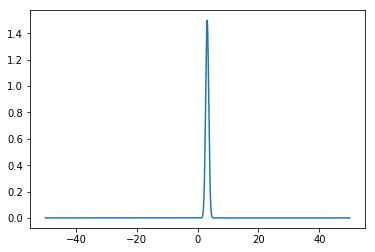

In [391]:
field = np.arange(-50, 50, 32*np.pi/2048)
xx = init(field)
nf = normfun(field, np.pi, 0.5)
plt.plot(field, xx)
plt.show()

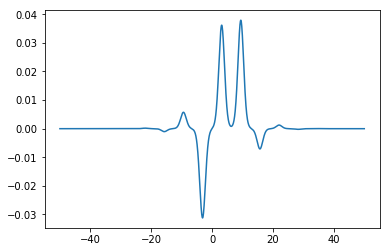

In [392]:
rslt = fsolve(fun, xx)
plt.plot(field, rslt)
plt.show()

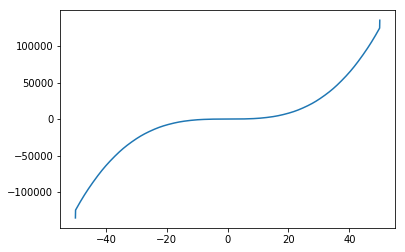

In [363]:
z = fun(field)
plt.plot(field, z)